### Universidad Católica "Nuestra Señora de la Asunción"
### Facultad de Ciencias y Tecnología
---

#Telecomunicaciones 1

#Laboratorio PAM

---




**1) Generación de Señales PAM:**

PAM en Banda Base

$s_m(t)=A_m\,p(t)$ para  $m=\pm 1, \pm 3,...,\pm M-1$

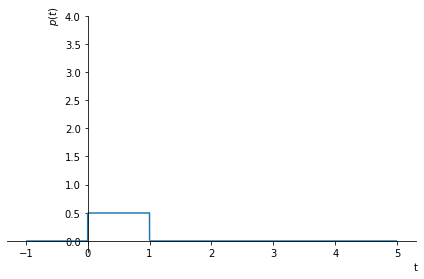

Am= [-3 -1  1  3]
Secuencia de entrada= [0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0]
Simbolos= [0 1 2 3 1 1 2 2]


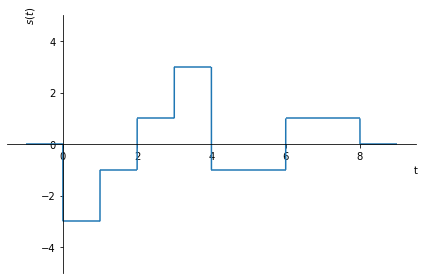

In [5]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
import math

sym.init_printing()

t = sym.symbols('t', real=True)
T=1     #Tiempo de simbolo
M=4     # Cantodad simbolos. Debe ser potencia de 2
k= int(math.log(M,2)) #Longitud del vectores de simbolos o bloque bits

p=sym.Heaviside(t) - sym.Heaviside(t - T) # Definimo el pulso
sym.plot(p, (t, -1, 5), ylim=[-0.2, 4], ylabel=r'$p(t)$'); #Graficamos p(t)


Am=np.arange(-M+1,M,2)  #Generamos el conjunto de ampitudes Am s/ PAM
print("Am=",Am)

s = sym.symbols('t', real=True)
q= sym.symbols('t', real=True)
#Definimos secuencia de bits de entrada a transmitir
I=[0,0,0,1,1,0,1,1,0,1,0,1,1,0,1,0]   #Debe ser multiplo de k= log2 M
#print(len(I))
#print(I[0])

symbols= np.zeros(int(len(I)/k),dtype=int)

#creamos el vector de simbolos
for i in range(0,len(symbols),1):
  for j in range(0,k,1):
    #print("Indice=",(i+1)*k-j-1)
    symbols[i]=symbols[i] + I[(i+1)*k-j-1]*math.pow(2,k+j-2)

print("Secuencia de entrada=",I)  
print("Simbolos=",symbols)

#PAM
#Generamos s(t)
s=0
for i in range(0,len(symbols),1):
  s=s + Am[symbols[i]]*(sym.Heaviside(t-i*T) - sym.Heaviside(t - (i+1)*T))

sym.plot(s, (t, -1, int(T*len(symbols)+1)), ylim=[-5, 5], ylabel=r'$s(t)$');

**1a) Generación de Señales PAM:**

PAM Paso Banda (ya con portadora)

$s_{m-bp}(t)=A_m\,p(t)=A_m\,g(t)*cos(2\pi f_c t)$ para  $m=\pm 1, \pm 3,...,\pm M-1$

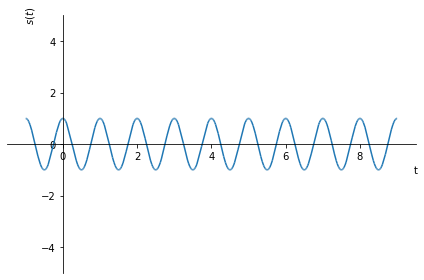

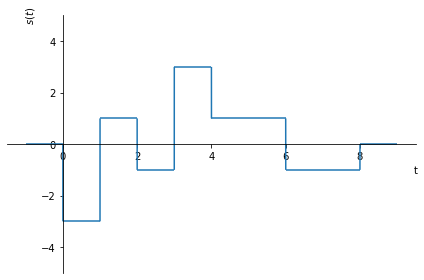

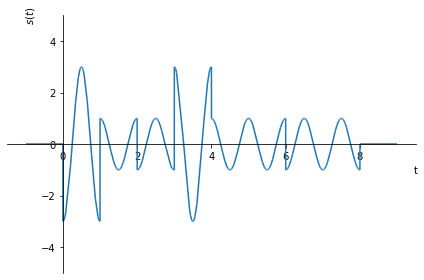

In [ ]:
c = sym.symbols('c', real=True)
fc=1
c= sym.cos(2*np.pi*fc*t)

s_bp=s*c
sym.plot(c, (t, -1, int(T*len(symbols)+1)), ylim=[-5, 5], ylabel=r'$s(t)$');
sym.plot(s, (t, -1, int(T*len(symbols)+1)), ylim=[-5, 5], ylabel=r'$s(t)$');
sym.plot(s_bp, (t, -1, int(T*len(symbols)+1)), ylim=[-5, 5], ylabel=r'$s(t)$');

**IMPORTANT**

1.   Ya se puede observar que la **discontinuidad de la fase** puede ser un problema importante en cuanto al efecto en el espectro/ancho de banda.
2.   Estrictamente, en PAM, la forma de la **función generadora** puede ser de cualquier forma. Hasta haora la hemos tomado como un pulso rectagular.
3.   Al multiplcar por la potadora $c=\cos(2\pi f_c t)$, estamos generando una PAM **DSB**. Podemso crear sus versiones **SSB**.



**1b) Generación de Señales ASK:**

ASK podemso ver como un caso particalr de PAM, donde las $A_m$ sopn elegidas de una manera particular para no tener dicontinuidad de fase.


$Am= 1, 2, 3, ...,M$



---



Enter the amplitude = 4
Enter the frequency  = 2


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  app.launch_new_instance()


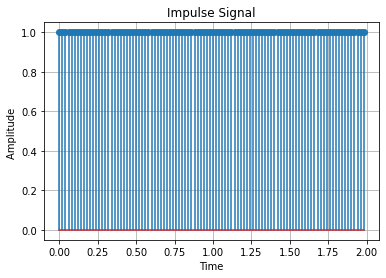

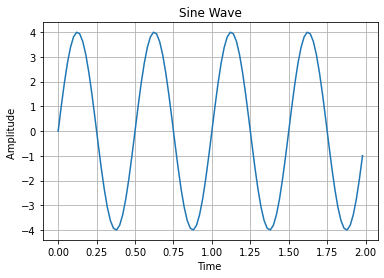

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


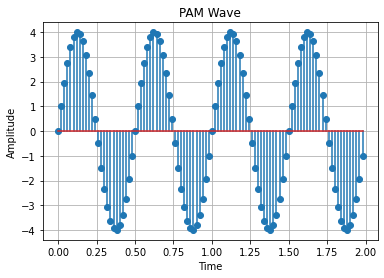

In [ ]:
import matplotlib.pylab as plt
import numpy as num

a = int(input('Enter the amplitude = '))
f = int(input('Enter the frequency  = '))

t = num.arange(0,2,0.02) # for a total of 16 samples
# %generation of an impulse signal
x1=[]
for i in range(len(t)):
    x1.append(1)
x2 = a*num.sin(2*num.pi*f*t)# %generation of sine wave
y = x1*x2; #modulation step
    
#for impulse signal plot
plt.stem(t,x1);
plt.title('Impulse Signal');
plt.xlabel('Time');
plt.ylabel('Amplitude ');
plt.grid(True)
plt.show()

#for sine wave plot
plt.plot(t,x2); 
plt.title('Sine Wave');
plt.xlabel('Time ');
plt.ylabel('Amplitude ');
plt.grid(True)
plt.show()

#for PAM wave plot
plt.stem(t,y);
plt.title('PAM Wave');
plt.xlabel('Time');
plt.ylabel('Amplitude');
plt.grid(True)
plt.show()

### Referencias


https://pysdr.org/content/digital_modulation.html

